你明天可以试试直接用python代码把这个每个指标的值给求出来
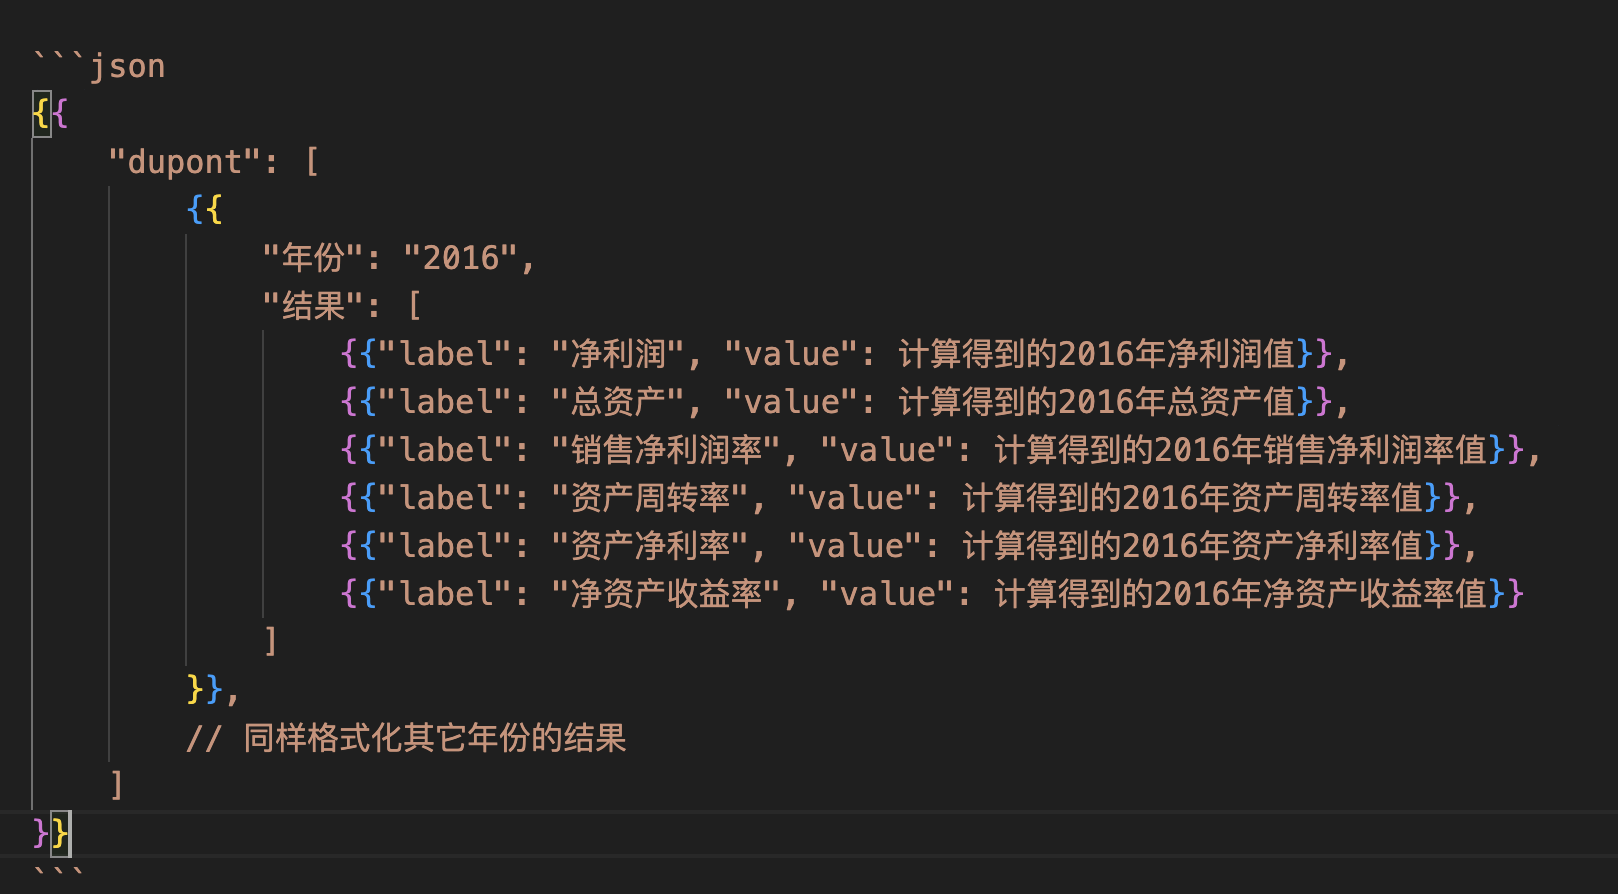

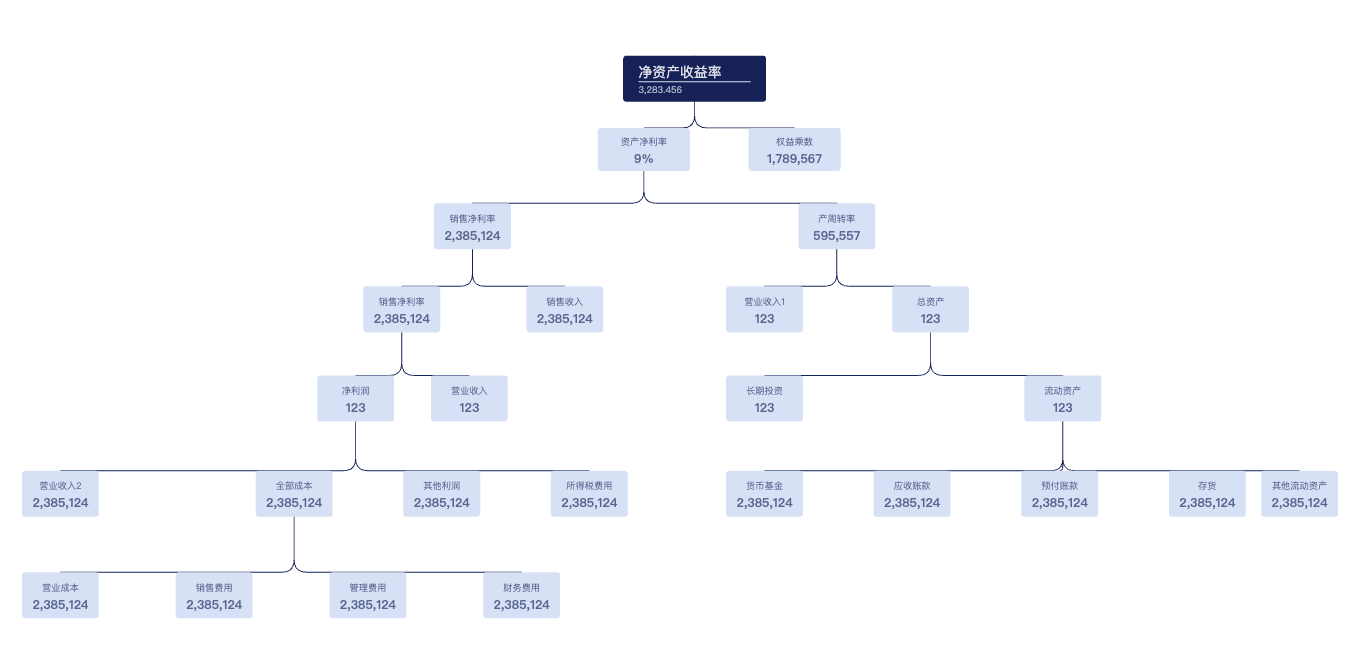

In [7]:
import pandas as pd 
import numpy as np 

data = pd.read_csv("dupont.csv")

In [8]:
data.columns

Index(['科目', '营业总成本', '营业总收入', '销售费用', '管理费用', '财务费用', '所得税费用', '货币资金', '应收账款',
       '预付款项', '存货', '其他流动资产', '净利润', '长期投资'],
      dtype='object')

In [9]:
df = pd.read_csv("财务指标报表综合_处理.csv")

构造杜邦需要的：
tier1 净资产收益率 = 资产净利率 x 权益乘数
tier2 资产净利率  =  销售净利率 x 资产周转率
      权益乘数    =  股东权益 / 总资产
tier3 只展开资产净利率
tier3 销售净利率 = 净利润 / 营业总收入
      资产周转率 = 营业总收入/ 总资产
tier4 净利润 = 营业利润+ 营业外收支 - 所得税费用
      总资产 = 流动资产+ 非流动资产
tier5 营业利润 = 营业总收入 - 营业总成本 + 其他收益 +投资收益 +汇兑收益 +净敞口套期收益 +公允价值变动收益+信用减值损失+资产减值损失 +资产处置收益（数据不全）

# 根据需要再看 总资产，营业总收入、营业总成本是不是需展开

In [28]:
df1 = df[['科目','资产总计(元)','流动资产合计(元)','非流动资产合计(元)','股东权益合计（含少数股东权益)(元)','营业总收入(元)','营业总成本(元)','营业利润(元)','减：营业外支出(元)','加：营业外收入(元)','所得税(元)']]
# 根据需要再看 总资产，营业总收入、营业总成本是不是需展开

In [33]:
# 创建一个布尔索引，选择科目列包含“累计”两个字的行
selected_rows = df1['科目'].str.contains('累计', case=False)

# 使用布尔索引选择包含“累计”的行
df2  = df1[selected_rows]
df2['科目'] = df2['科目'].str[0:4]

df2 = df2.astype(float, errors='ignore')


/var/folders/6m/zhsd4tmj3dx1xr0nv4dvddvh0000gn/T/ipykernel_80663/2111388740.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['科目'] = df2['科目'].str[0:4]


In [34]:

df2['权益乘数'] = df2['股东权益合计（含少数股东权益)(元)']/df2['资产总计(元)']
df2['净利润'] = df2['营业利润(元)']- df2['减：营业外支出(元)'] + df2['加：营业外收入(元)']-df2['所得税(元)']
df2['资产周转率'] = df2['营业总收入(元)'] / df2['资产总计(元)']
df2['销售净利率'] = df2['净利润'] / df2['营业总收入(元)']
df2['资产净利率'] = df2['销售净利率'] * df2['资产周转率'] 
df2['净资产收益率'] = df2['资产净利率'] * df2['权益乘数'] 

In [35]:
df2.columns

Index(['科目', '资产总计(元)', '流动资产合计(元)', '非流动资产合计(元)', '股东权益合计（含少数股东权益)(元)',
       '营业总收入(元)', '营业总成本(元)', '营业利润(元)', '减：营业外支出(元)', '加：营业外收入(元)', '所得税(元)',
       '权益乘数', '净利润', '资产周转率', '销售净利率', '资产净利率', '净资产收益率'],
      dtype='object')

In [38]:
import json
dupont_list=[]
for i,row in df2.iterrows():
    item={"年份":str(int(row['科目'])),
          "结果":[
              {'label':'净资产收益率','value':row['净资产收益率']},
              {'label':'资产净利率','value':row['资产净利率']},
              {'label':'权益乘数','value':row['权益乘数']},
              {'label':'销售净利率','value':row['销售净利率']},
              {'label':'资产周转率','value':row['资产周转率']},
              {'label':'净利润','value':row['净利润']},
              {'label':'营业总收入','value':row['营业总收入(元)']},
              {'label':'总资产','value':row['资产总计(元)']},
              {'label':'流动资产','value':row['流动资产合计(元)']},
              {'label':'非流动资产','value':row['非流动资产合计(元)']},
              {'label':'营业利润','value':row['营业利润(元)']},
              {'label':'营业外支出','value':row['减：营业外支出(元)']},
              {'label':'营业外收入','value':row['加：营业外收入(元)']},
              {'label':'所得税','value':row['所得税(元)']},
          ]}
    dupont_list.append(item)

dupont_dict = {
    "dupont": dupont_list
}

# 将字典转换为JSON格式
dupont_json = json.dumps(dupont_dict, indent=4, ensure_ascii=False)

# 创建一个文件并写入JSON数据
with open("dupont_data.json", "w", encoding="utf-8") as file:
    file.write(dupont_json)
